In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import csv
import os
from datetime import datetime

%matplotlib inline

# ·收集数据

In [2]:
# pd.read_csv()读取twitter-archive-enhanced.csv内的信息并保存到twitter_archive_enhanced中
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
list(twitter_archive_enhanced)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [4]:
# 从URL中获取数据
URL = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(URL)
with open(URL.split('/')[-1],mode = 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
image_predictions.head()     

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
#将神经网络的预测结果保存为image_predictions.tsv文件
image_predictions.to_csv('image_predictions.tsv', index = False)

In [6]:
list(image_predictions)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [6]:
#提取需要被分析的列信息
with open('tweet_json.txt','r')as file:
    tweet_list = []
    for row in file:
        json_dict = json.loads(row)
        append_col = {
           'tweet_id':json_dict['id_str'],
           'retweet_count':json_dict['retweet_count'],
           'favorite_count':json_dict['favorite_count']
        }
        tweet_list.append(append_col)
tweet = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


# ·评估数据

In [7]:
#设置显示列数及列宽
pd.options.display.max_columns = 100
pd.set_option('max_colwidth',200)

## twitter_archive_enhanced评估分析

In [7]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [81]:
twitter_archive_enhanced.sample(1).timestamp

759    2016-09-21 00:53:04 +0000
Name: timestamp, dtype: object

#### 1、timestamp属性的数据类型错误
#### 2、rating_numerator & rating_denominator评分的分子分母应该合并为一个属性，数据类型为float
#### 3、doggo、floofer、pupper、puppo狗狗的四个成长阶段应该合并为一个属性
#### 4、in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp数据缺失量比较大
#### 5、expanded_urls存在部分数据缺失

In [59]:
twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### 6、twitter_archive_enhanced的source属性中存在URL重复

In [12]:
dog_stage = twitter_archive_enhanced[['doggo', 'floofer', 'pupper', 'puppo']]
dog_stage.replace('None',np.nan).notnull().sum(axis=1).value_counts()

0    1976
1     366
2      14
dtype: int64

#### 7、狗狗的阶段类型： 存在1976条数据缺失

In [30]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [29]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### 8、评分分母不全部为10，且部分分母数值较大，似乎为错误数据

In [32]:
twitter_archive_enhanced.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Lucy            11
Cooper          11
Lola            10
Tucker          10
Penny           10
Winston          9
Bo               9
Sadie            8
the              8
Bailey           7
Buddy            7
Daisy            7
an               7
Toby             7
Koda             6
Bella            6
Leo              6
Stanley          6
Jack             6
Dave             6
Rusty            6
Milo             6
Scout            6
Jax              6
Oscar            6
Sunny            5
              ... 
Pip              1
Gustaf           1
Harrison         1
Rontu            1
Koko             1
Kawhi            1
Evy              1
Asher            1
Shakespeare      1
Jim              1
Filup            1
Fiji             1
Barney           1
Kaiya            1
Stella           1
Chaz             1
Kota             1
Dale             1
Oreo             1
Anthony          1
Jackie           1
Julio       

#### 9、狗狗名称存在‘a、'an'、'the'及None,应该是错误的

In [14]:
twitter_archive_enhanced.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

## image_predictions评估分析

In [38]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
697,684538444857667585,https://pbs.twimg.com/ext_tw_video_thumb/684538367950872576/pu/img/kTKOkSU45BS-fpq8.jpg,1,Chihuahua,0.702583,True,Siamese_cat,0.068218,False,macaque,0.043325,False
415,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,Pembroke,0.742320,True,Cardigan,0.084937,True,Eskimo_dog,0.068321,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.004020,True
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True
404,673705679337693185,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,1,Shih-Tzu,0.165383,True,Lhasa,0.116977,True,Yorkshire_terrier,0.063899,True


In [42]:
list(image_predictions)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [43]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [40]:
image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                            2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                                            2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                            2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                       

In [45]:
sum(image_predictions.jpg_url.duplicated())

66

#### 10、image_predictions中预测的图像资源链接有66条重复，可能是转发产生的，应该被删除

## tweet评估分析

In [47]:
tweet.sample(5)

,tweet_id,retweet_count,favorite_count
2330,666293911632134144,365,519
874,760656994973933572,2198,7308
22,887473957103951883,18813,70007
193,854732716440526848,6657,24116
1519,690607260360429569,19,311


In [48]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [58]:
all_columns = pd.Series(list(twitter_archive_enhanced) + list(image_predictions)+list(tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## 数据评估描述  
### 数据质量问题  
1、twitter_archive_enhanced的timestamp 类型错误，应该修改为datatime  
2、tweet、image_predictions、twitter_archive_enhanced中tweet_id数据类型不一样  
3、twitter_archive_enhanced的expanded_urls 存在缺失，数据量2297小于2356 删除,并且部分URL重复出现  
4、twitter_archive_enhanced的评分分母不全为10，应该从text文档中重新提取  
5、twitter_archive_enhanced的狗狗成长阶段类型较多缺失值，还存在部分重复  
6、twitter_archive_enhanced的name列存在数据错误    
7、image_predictions的jpg_url属性存在66条重复连接  
8、twitter_archive_enhanced中存在转发消息，应该被删除  
9、存在回复信息、转发信息（对分析没用，应该被删除）  
in_reply_to_status_id：回复ID 删除
in_reply_to_user_id：被回复推文原始用户ID 删除
retweeted_status_id：转发ID删除
retweeted_status_user_id：转发用户ID删除
retweeted_status_timestamp：转发时间删除
### 整洁度问题  
1、狗狗的阶段类型应该用一个字段属性表示  
2、评分应该为分子/分母整合为一个列属性  
3、tweet、image_predictions、twitter_archive_enhanced三表中观测类型相同，可以进行合并为一张表

# ·清洗数据

In [64]:
#源数据备份
twitter_archive_copy = twitter_archive_enhanced.copy()
image_predictions_copy = image_predictions.copy()
tweet_copy = tweet.copy()

### 1、修改twitter_archive_enhanced的timestamp数据类型为datetime

In [65]:
timestamp = pd.DataFrame([' '.join(item.split()[0:2]) for item in twitter_archive_copy['timestamp']])
twitter_archive_copy[['timestamp']] = pd.to_datetime(timestamp[0],format = '%Y-%m-%d %H:%M:%S')
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### 2、修改twitter_archive_enhanced和image_predictions的tweet_id数据类型为str

In [66]:
twitter_archive_copy[['tweet_id']] = twitter_archive_copy[['tweet_id']].astype(str)
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [67]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [68]:
image_predictions_copy[['tweet_id']] = image_predictions_copy[['tweet_id']].astype(str)
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


### 3、删除twitter_archive_enhanced中expanded_urls 缺失的数据行

In [69]:
twitter_archive_copy = twitter_archive_copy.loc[twitter_archive_copy.expanded_urls.notnull()]
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: datetime64[ns](

### 4、twitter_archive_enhanced的评分分母不全为10，应该从text文档中重新提取
### 整合'rating_numerator','rating_denominator'为‘rating’

In [70]:
# 查看评分分母不为10的数据行
twitter_archive_copy.loc[twitter_archive_copy.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",9,11
902,758467244762497024,Why does this never happen at my front door......,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80


In [71]:
#人工识别部分信息（分子、分母）
denominator_dict={
    784:[14,10],
    1068:[14,10],
    1165:[13,10],
    1202:[11,10],
    1662:[10,10],
    2335:[9,10]
}
for key,value in denominator_dict.items():
    twitter_archive_copy.loc[key,['rating_numerator','rating_denominator']] = denominator_dict[key]

twitter_archive_copy.loc[denominator_dict.keys(),['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",14,10
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",14,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,13,10
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,11,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,10,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,9,10


In [72]:
#整合rating_numerator&rating_denominator为一个列属性rating
twitter_archive_copy['rating'] = twitter_archive_copy['rating_numerator']/twitter_archive_copy['rating_denominator']
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2297 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
rating                 

In [73]:
# 删除多余的整合rating_numerator&rating_denominator属性
twitter_archive_copy.drop(['rating_numerator','rating_denominator'],axis =1,inplace=True)
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2297 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
rating                        2297 non-null float64
dtypes: datetime64[ns](1), float64(5), object(10)
memory usage: 385.1+ 

### 5、twitter_archive_enhanced的狗狗成长阶段类型较多缺失值，还存在部分重复
### 整合多个狗狗成长阶段类型为一个‘stage’属性

In [74]:
twitter_archive_copy_tmp = twitter_archive_copy[['tweet_id','doggo','floofer','pupper','puppo']]
twitter_archive_copy_tmp.tail()

,tweet_id,doggo,floofer,pupper,puppo
2351,666049248165822465,None,None,None,None
2352,666044226329800704,None,None,None,None
2353,666033412701032449,None,None,None,None
2354,666029285002620928,None,None,None,None
2355,666020888022790149,None,None,None,None


In [98]:
#从text属性中重新提取狗狗的成长阶段信息
twitter_archive_copy['stage'] = twitter_archive_copy.text.str.lower().str.findall('(doggo|pupper|puppo|floofer)')
print(twitter_archive_copy['stage'])
twitter_archive_copy['stage'] = twitter_archive_copy['stage'].apply(lambda x: ','.join(set(x)))
#twitter_archive_copy['stage'].sample(5)

0             []
1             []
2             []
3             []
4             []
5             []
6             []
7             []
8             []
9        [doggo]
10            []
11            []
12       [puppo]
13            []
14       [puppo]
15            []
16            []
17            []
18            []
20            []
21            []
22            []
23            []
24            []
25            []
26            []
27            []
28            []
29      [pupper]
31            []
          ...   
2326          []
2327          []
2328          []
2329          []
2330          []
2331          []
2332          []
2333          []
2334          []
2335          []
2336          []
2337          []
2338          []
2339          []
2340          []
2341          []
2342          []
2343          []
2344          []
2345          []
2346          []
2347          []
2348          []
2349          []
2350          []
2351          []
2352          []
2353          

### 函数解释  

In [76]:
#str.lower()-->实现字符串中所有字符转化为小写表示
print('Data Wangle'.lower())

data wangle


In [77]:
#set()将一个可迭代对象转换成一个集合对象
x = set('wangle')
print(type(x))

<class 'set'>


In [100]:
test_list = ['doggo','floofer','pupper','puppo']#Iterable
test_set = set(test_list)
set_str = '_'.join(test_set)
set_str

'doggo_puppo_pupper_floofer'

### ‘stage’清洗逻辑  
因为狗狗成长阶段数据存在大量空缺，但发现可以从text属性中从新提取，于是利用findall()正则匹配函数从text中匹配'(doggo|pupper|puppo|floofer)',返回数据类型为list，匹配前需要将text中所有字符转为小写（正则匹配区分大小写），再对‘stage’的每行执行内容list-->set-->str操作（通过','.join(set(x))）实现

In [27]:
twitter_archive_copy['stage'].value_counts()

                1854
pupper           268
doggo             87
floof             37
puppo             33
doggo,pupper      12
doggo,floof        3
doggo,puppo        2
pupper,floof       1
Name: stage, dtype: int64

In [78]:
#依旧存在缺失值，将空值用np.nan替换
twitter_archive_copy['stage'] = twitter_archive_copy['stage'].replace('',np.nan)
twitter_archive_copy['stage'].value_counts()

pupper           269
doggo             89
puppo             33
doggo,pupper      12
floofer            9
doggo,puppo        2
doggo,floofer      1
Name: stage, dtype: int64

In [29]:
#删除多余的'doggo','floofer','pupper','puppo'属性
twitter_archive_copy.drop(twitter_archive_copy[['doggo','floofer','pupper','puppo']],axis=1,inplace=True)
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2297 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
name                          2297 non-null object
rating                        2297 non-null float64
stage                         443 non-null object
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 331.2+ KB


### 6、修改twitter_archive_enhanced中错误的name属性值

In [79]:
twitter_archive_copy['name'].value_counts()

None          686
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
Sadie           8
the             8
Buddy           7
Bailey          7
Daisy           7
an              7
Toby            7
Leo             6
Bella           6
Rusty           6
Jack            6
Koda            6
Stanley         6
Dave            6
Scout           6
Milo            6
Jax             6
Oscar           6
Phil            5
             ... 
Joey            1
Major           1
Jimbo           1
Grey            1
Todo            1
Al              1
Perry           1
Monty           1
Brady           1
Stu             1
Mollie          1
Norman          1
Georgie         1
Ralpher         1
Stormy          1
Bobble          1
Humphrey        1
Jonah           1
Aubie           1
such            1
Strudel         1
Howie           1
Tito            1
Karll           1
officially

In [31]:
#从text中重新提取当前name为'a','the','an','None'的
name_part = ['a','the','an','None']
for name in name_part:
    twitter_archive_copy['name'] = twitter_archive_copy['name'].replace(name,np.nan)
twitter_archive_copy['name'].value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
Daisy          7
Bailey         7
Buddy          7
Toby           7
Leo            6
Milo           6
Rusty          6
Jax            6
Dave           6
Stanley        6
Scout          6
Koda           6
Oscar          6
Bella          6
Jack           6
Alfie          5
Gus            5
Phil           5
Finn           5
very           5
              ..
Major          1
Jimbo          1
Grey           1
Todo           1
Lugan          1
Willem         1
Kloey          1
Al             1
Strudel        1
Norman         1
Georgie        1
Ralpher        1
Stormy         1
Bobble         1
Humphrey       1
Jonah          1
Brady          1
Aubie          1
Howie          1
Perry          1
Tito           1
Karll          1
officially     1
Harvey         1
Scott          1
Dook           1
Jarod          1
such          

In [71]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2297 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
name                          1541 non-null object
rating                        2297 non-null float64
stage                         443 non-null object
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 331.2+ KB


### 7、删除image_predictions中的jpg_url属性存在重复的记录

In [32]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [80]:
image_predictions.drop_duplicates('jpg_url',inplace = True)
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [34]:
sum(image_predictions.jpg_url.duplicated())

0

### 8、删除因转发产生的数据信息

In [81]:
twitter_archive_copy['retweeted_status_id'].notnull().value_counts()

False    2117
True      180
Name: retweeted_status_id, dtype: int64

In [82]:
#删除转发产生的数据行
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].isnull()]
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
rating                        2117 non-null float64
stage                         377 non-null object
dtypes: datetime64[ns](1), 

### 9、删除相关转发、回复属性行

In [83]:
# 删除转发相关的属性
twitter_archive_copy.drop(twitter_archive_copy[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']],axis =1,inplace = True)
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
rating                   2117 non-null float64
stage                    377 non-null object
dtypes: datetime64[ns](1), float64(3), object(10)
memory usage: 248.1+ KB


In [84]:
# 删除相关回复属性
twitter_archive_copy.drop(twitter_archive_copy[['in_reply_to_status_id', 'in_reply_to_user_id']],axis =1,inplace = True)
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id         2117 non-null object
timestamp        2117 non-null datetime64[ns]
source           2117 non-null object
text             2117 non-null object
expanded_urls    2117 non-null object
name             2117 non-null object
doggo            2117 non-null object
floofer          2117 non-null object
pupper           2117 non-null object
puppo            2117 non-null object
rating           2117 non-null float64
stage            377 non-null object
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 215.0+ KB


### 10、合并三个数据片段，并保存

In [85]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id         2117 non-null object
timestamp        2117 non-null datetime64[ns]
source           2117 non-null object
text             2117 non-null object
expanded_urls    2117 non-null object
name             2117 non-null object
doggo            2117 non-null object
floofer          2117 non-null object
pupper           2117 non-null object
puppo            2117 non-null object
rating           2117 non-null float64
stage            377 non-null object
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 215.0+ KB


In [86]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [87]:
tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [88]:
# 合并数据集
twitter_archive_df = twitter_archive_copy.merge(image_predictions_copy,how= 'inner',on='tweet_id').merge(tweet_copy,how='left',on='tweet_id')
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id          1994 non-null object
timestamp         1994 non-null datetime64[ns]
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1994 non-null object
doggo             1994 non-null object
floofer           1994 non-null object
pupper            1994 non-null object
puppo             1994 non-null object
rating            1994 non-null float64
stage             342 non-null object
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-nu

In [43]:
#保存数据集
twitter_archive_df.to_csv('twitter_archive_master.csv', index=False)

# 数据分析

## 提出问题  

### 1、什么类型的狗狗更受欢迎
### 2、那个阶段的狗狗占比更高
### 3、狗狗的评分是否与转发数与点赞数有关

## 问题分析、可视化展示
### 1、什么类型的狗狗更受欢迎

In [117]:
dog_info_df = pd.read_csv('twitter_archive_master.csv')
dog_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id          1994 non-null int64
timestamp         1994 non-null object
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1380 non-null object
rating            1994 non-null float64
stage             369 non-null object
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
dtypes: bool(3), float64(4), int64(4), object(10)
memory usage: 286.3+ KB


In [118]:
df_varieties=dog_info_df[['p1','p1_dog','p2','p2_dog','p3','p3_dog','favorite_count']]
df_varieties.sample(5)

,p1,p1_dog,p2,p2_dog,p3,p3_dog,favorite_count
1285,Pomeranian,True,Shetland_sheepdog,True,keeshond,True,2255
1230,English_springer,True,papillon,True,Welsh_springer_spaniel,True,2225
1451,Japanese_spaniel,True,Pekinese,True,Chihuahua,True,1355
1495,pug,True,Boston_bull,True,French_bulldog,True,2460
1427,dogsled,False,snowmobile,False,Samoyed,True,2641


In [119]:
#提取所有狗狗的品种(神经网络分析出狗狗属于多个品种，默认取分析出的第一个品种)
varieties = []
for ind in df_varieties.index:
    if df_varieties.loc[ind,'p1_dog'] == True:
        varieties.append(df_varieties.loc[ind,'p1'])
    elif df_varieties.loc[ind,'p2_dog'] == True:
        varieties.append(df_varieties.loc[ind,'p2'])
    elif df_varieties.loc[ind,'p2_dog'] == True:
        varieties.append(df_varieties.loc[ind,'p3'])
    else:
        varieties.append(np.nan)
df_varieties['variety'] = varieties
df_varieties.sample(5)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,p1,p1_dog,p2,p2_dog,p3,p3_dog,favorite_count,variety
1701,miniature_poodle,True,toy_poodle,True,Irish_terrier,True,504,miniature_poodle
1213,Samoyed,True,Great_Pyrenees,True,teddy,False,3995,Samoyed
726,bow_tie,False,sunglasses,False,sunglass,False,5594,NaN
464,wire-haired_fox_terrier,True,Lakeland_terrier,True,English_springer,True,10961,wire-haired_fox_terrier
332,prison,False,palace,False,umbrella,False,49786,NaN


In [120]:
#删除狗狗品种的缺失值
df_varieties = df_varieties[df_varieties['variety'].notnull()]
df_varieties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 1 to 1993
Data columns (total 8 columns):
p1                1624 non-null object
p1_dog            1624 non-null bool
p2                1624 non-null object
p2_dog            1624 non-null bool
p3                1624 non-null object
p3_dog            1624 non-null bool
favorite_count    1624 non-null int64
variety           1624 non-null object
dtypes: bool(3), int64(1), object(4)
memory usage: 80.9+ KB


In [121]:
#统计受人们喜欢的狗狗品种的前十名
varieties_info = df_varieties.groupby('variety')['favorite_count'].size().sort_values(ascending = False).head(10)
varieties_info.head()

variety
golden_retriever      152
Labrador_retriever    105
Pembroke               93
Chihuahua              90
pug                    58
Name: favorite_count, dtype: int64

In [124]:
varieties_info_dict = {"variety":varieties_info.index,"favorite_count":varieties_info.values}
varieties_info_df = pd.DataFrame(varieties_info_dict)
varieties_info_df.head(10)

,variety,favorite_count
0,golden_retriever,152
1,Labrador_retriever,105
2,Pembroke,93
3,Chihuahua,90
4,pug,58
5,toy_poodle,47
6,chow,44
7,Pomeranian,41
8,Samoyed,41
9,French_bulldog,31


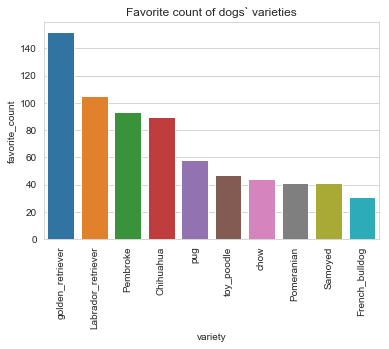

In [128]:
#可视化展示
sns.set_style('whitegrid')
sns.barplot(x=varieties_info_df['variety'], y=varieties_info_df['favorite_count'])
plt.title('Favorite count of dogs` varieties')
plt.xticks(rotation=90)
plt.show()

### 2、那个阶段的狗狗占比更高

In [131]:
#获取狗狗的成长阶段信息
stage_info_df = dog_info_df[['stage']]
stage_info_s = stage_info_df.stage.value_counts()
stage_info_s.head()

pupper          227
doggo            67
floof            34
puppo            27
pupper,doggo      9
Name: stage, dtype: int64

In [135]:
stage_info_dict = {'stage':stage_info_s.index,'stage_count':stage_info_s.values}
stage_info_df = pd.DataFrame(stage_info_dict)
stage_info_df.head(10)

,stage,stage_count
0,pupper,227
1,doggo,67
2,floof,34
3,puppo,27
4,"pupper,doggo",9
5,"doggo,puppo",2
6,"doggo,floof",2
7,"pupper,floof",1


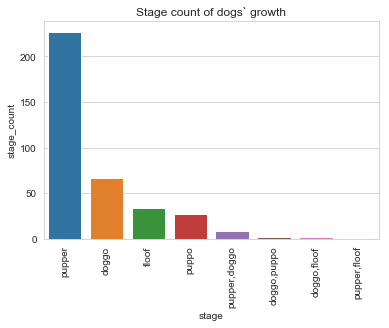

In [136]:
#可视化展示(柱状图)
sns.set_style('whitegrid')
sns.barplot(x=stage_info_df['stage'], y=stage_info_df['stage_count'])
plt.title('Stage count of dogs` growth')
plt.xticks(rotation=90)
plt.show()

### 3、狗狗的评分是否与转发数与点赞数有关

In [137]:
dog_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id          1994 non-null int64
timestamp         1994 non-null object
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1380 non-null object
rating            1994 non-null float64
stage             369 non-null object
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
dtypes: bool(3), float64(4), int64(4), object(10)
memory usage: 286.3+ KB


In [138]:
#提取相关属性
dog_rating_favorite_df =dog_info_df[['rating','retweet_count','favorite_count']] 
dog_rating_favorite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 3 columns):
rating            1994 non-null float64
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
dtypes: float64(1), int64(2)
memory usage: 46.8 KB


D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


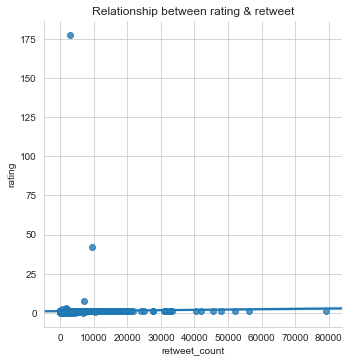

In [145]:
#绘制回归图(评分与转发量)
sns.set_style('whitegrid')
sns.lmplot(x='retweet_count',y='rating',data = dog_rating_favorite_df)
plt.title('Relationship between rating & retweet')
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


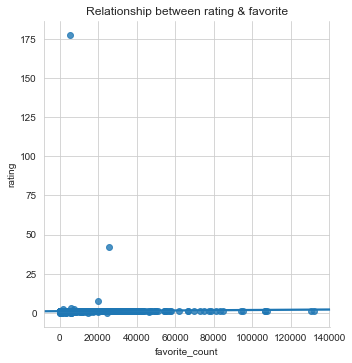

In [148]:
#绘制回归图(评分与转点赞数)
sns.set_style('whitegrid')
sns.lmplot(x='favorite_count',y='rating',data = dog_rating_favorite_df)
plt.title('Relationship between rating & favorite')
plt.show()

### 因为rating数值太小 看不出评分与转发数和点赞数的关系
### 修改问题3为：3、转发数与点赞数的关系

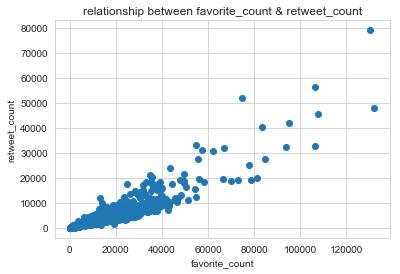

In [147]:
plt.scatter(dog_rating_favorite_df['favorite_count'],dog_rating_favorite_df['retweet_count'])
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('relationship between favorite_count & retweet_count')
plt.show()

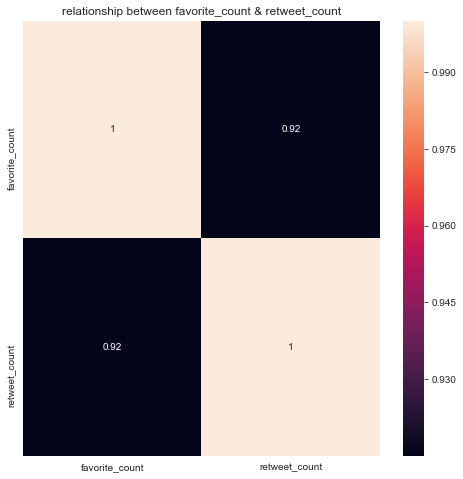

In [149]:
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(dog_rating_favorite_df[['favorite_count','retweet_count']].corr(),annot=True,ax=ax)
plt.title('relationship between favorite_count & retweet_count')
plt.show()